In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tqdm import tqdm

In [4]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = None, test_split = 0.2)

print('훈련용 데이터 셋:', len(X_train))
print('테스트용 데이터 셋:', len(X_test))

num_classes = len(set(y_train))
print('카테고리:', num_classes)

훈련용 데이터 셋: 8982
테스트용 데이터 셋: 2246
카테고리: 46


In [5]:
print('첫번째 데이터 셋: ', X_train[0])
print('첫번째 데이터의 카테고리', y_train[0])

첫번째 데이터 셋:  [1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
첫번째 데이터의 카테고리 3


In [9]:
max_train = max(len(data) for data in X_train)
max_test = max(len(data) for data in X_test)

sum_train = sum(len(data) for data in X_train)
sum_test = sum(len(data) for data in X_test)

print('뉴스 기사의 최대 길이: ', max([max_train, max_test]))
print('뉴스 기사의 평균 길이: ', (sum_train + sum_test) / (len(X_train) + len(X_test)))

뉴스 기사의 최대 길이:  2376
뉴스 기사의 평균 길이:  145.96419665122906


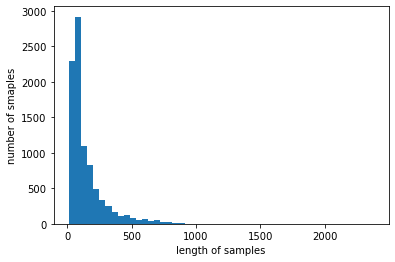

In [10]:
plt.hist([len(data) for data in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of smaples')
plt.show()

In [11]:
import pandas as pd
df = pd.DataFrame(y_train, columns = ['lables'])

/Users/gimhyeongeun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


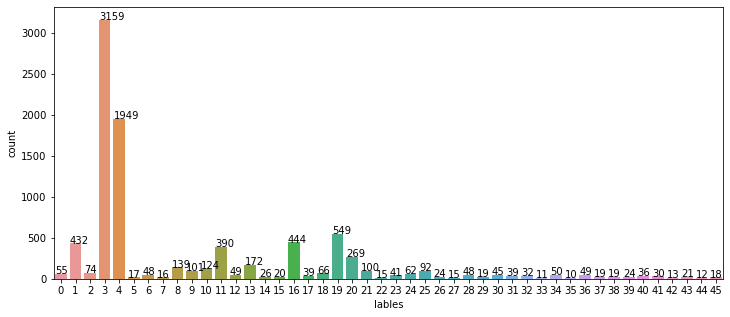

In [12]:
# lable 별 갯수 확인하기
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(12,5)
ax = sns.countplot(df['lables'])
for p, label in zip(ax.patches, df['lables'].value_counts().sort_index()):
    ax.annotate(label, (p.get_x(), p.get_height() + 0.15))

In [13]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


--------

In [14]:
word_to_index = reuters.get_word_index()
print('단어 갯수: ', len(word_to_index))

단어 갯수:  30979


In [16]:
#주의할 점은 로이터 데이터의 규칙에 따라
# reuters.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수이다.

index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

In [17]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[4]))
print('빈도수 상위 128등 단어 : {}'.format(index_to_word[131]))

빈도수 상위 1번 단어 : the
빈도수 상위 128등 단어 : tax


In [18]:
# index_to_word에서 
# 숫자 0은 패딩을 의미하는 토큰인 pad, 
# 숫자 1은 문장의 시작을 의미하는 sos, 
# 숫자 2는 OOV를 위한 토큰인 unk라는 특별 토큰에 맵핑되어져야 합니다. 
# 이를 반영하여 index_to_word를 완성해줍니다.

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

print('첫 번째 데이터의 문장: ',' '.join([index_to_word[sequence] for sequence in X_train[0]]))

첫 번째 데이터의 문장:  <sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [19]:
# 데이터 별 시퀀스 만들기

new_X_train = []
new_X_test = []

for sequence in X_train:
    new_X_train.append([index_to_word[word] for word in sequence])
    
for sequence in X_test:
    new_X_test.append([index_to_word[word] for word in sequence])

print(len(new_X_train))
print(len(new_X_test))


8982
2246


In [20]:
# 불용어 제거

from nltk.corpus import stopwords
stops = set(stopwords.words('english'))

X_train_2 = []
X_test_2 = []

for sequence in new_X_train:
    text = [w for w in sequence if not w in stops] 
    X_train_2.append(text)
    
for sequence in new_X_test:
    text = [w for w in sequence if not w in stops] 
    X_test_2.append(text)
    
print(len(X_train_2))
print(len(X_test_2))

8982
2246


-------

In [21]:
# 데이터 내에 있는 모든 정수를 '<int>'로 변경한다.

for sequence in tqdm(X_train_2):
    for idx, word in enumerate(sequence):
        try: 
            int(word)
            sequence[idx] = '<int>'
        except:
            continue

for sequence in tqdm(X_test_2):
    for idx, word in enumerate(sequence):
        try: 
            int(word)
            sequence[idx] = '<int>'
        except:
            continue

100%|██████████| 2246/2246 [00:00<00:00, 10086.36it/s]


In [22]:
max_train = max(len(data) for data in X_train_2)
max_test = max(len(data) for data in X_test_2)

sum_train = sum(len(data) for data in X_train_2)
sum_test = sum(len(data) for data in X_test_2)

# 불용어와 정수 변환을 한 후의 데이터의 길이

print('뉴스 기사의 최대 길이: ', max([max_train, max_test]))
print('뉴스 기사의 평균 길이: ', (sum_train + sum_test) / (len(X_train) + len(X_test)))

뉴스 기사의 최대 길이:  2278
뉴스 기사의 평균 길이:  100.02520484503029


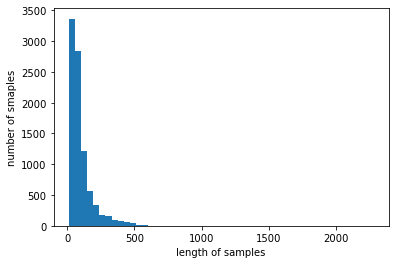

In [23]:
plt.hist([len(data) for data in X_train_2], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of smaples')
plt.show()

------

In [31]:
# Counter
# 하나의 리스트로 변환하기
all_word_list = sum(X_train_2, [])
all_word_list2 = sum(X_test_2, [])

all_word_list = all_word_list + all_word_list2

print('총 단어의 갯수:', len(all_word_list))

총 단어의 갯수: 1123083


In [32]:
from collections import Counter

# 단어별 등장 횟수
vocab = Counter(all_word_list)

small_words = []
X_train_3 = []
X_test_3  = []

# 희귀 단어 제거하기

threshold = 2


# 희귀 단어 리스 만들기
for key, value in vocab.items():
    if value < threshold:
        small_words.append(key)

# 희귀 단어를 제거한 데이터 셋 만들기
for sequence in tqdm(X_train_2):
    text = [w for w in sequence if not w in small_words] 
    X_train_3.append(text)
    
for sequence in tqdm(X_test_2):
    text = [w for w in sequence if not w in small_words] 
    X_test_3.append(text)

100%|██████████| 2246/2246 [00:34<00:00, 65.81it/s]


In [33]:
max_train = max(len(data) for data in X_train_3)
max_test = max(len(data) for data in X_test_3)

sum_train = sum(len(data) for data in X_train_3)
sum_test = sum(len(data) for data in X_test_3)

# 불용어와 정수 변환을 한 후의 데이터의 길이

print('뉴스 기사의 최대 길이: ', max([max_train, max_test]))
print('뉴스 기사의 평균 길이: ', (sum_train + sum_test) / (len(X_train) + len(X_test)))

뉴스 기사의 최대 길이:  2276
뉴스 기사의 평균 길이:  99.13092269326684


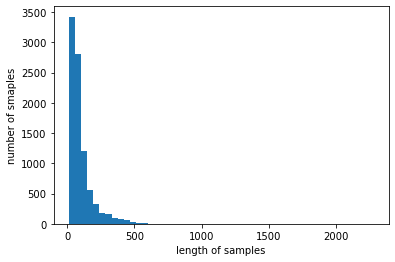

In [34]:
plt.hist([len(data) for data in X_train_3], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of smaples')
plt.show()

-----

In [35]:
# 희귀 단어 제거

all_word_list = sum(X_train_3, [])
all_word_list2 = sum(X_test_3, [])

all_word_list = all_word_list + all_word_list2

In [36]:
len(all_word_list)

1113042

In [39]:
vocab = Counter(all_word_list)

# 희귀단어를 제거한 단어 목록 중 빈도수가 높은 top 5 목록
sorted_dict = sorted(vocab.items(), key = lambda item: item[1], reverse = True)
sorted_dict[0:5]

[('<int>', 168015),
 ('said', 29978),
 ('mln', 20141),
 ('vs', 15015),
 ('dlrs', 13329)]

In [41]:
# 희귀 단어를 제거한 word_to_idx
word_to_idx = {}

# 숫자 0은 패딩을 의미하는 토큰인 pad, 
# 숫자 1은 문장의 시작을 의미하는 sos, 
# 숫자 2는 OOV를 위한 토큰인 unk라는 특별 토큰에 맵핑되어져야 합니다. 
# 숫자 4는 idx

for index, token in enumerate(("<pad>", "<sos>", "<unk>", '<int>')):
    word_to_idx[token] = index
    
idx = 4
for sets in sorted_dict:
        if not sets[0] in ["<pad>", "<sos>", "<unk>", '<int>']:
            word_to_idx[sets[0]] = idx
            idx += 1
            
print('word_to_idx: ', len(word_to_idx))

word_to_idx:  19231


---------

In [42]:
# 시퀀스화 하기

X_train_4 = []
X_test_4 = []

for sequence in tqdm(X_train_3):
    text = [word_to_idx[w] for w in sequence] 
    X_train_4.append(text)
    
for sequence in tqdm(X_test_3):
    text = [word_to_idx[w] for w in sequence] 
    X_test_4.append(text)
        
print(len(X_train_4))
print(len(X_test_4))

100%|██████████| 2246/2246 [00:00<00:00, 101210.90it/s]

8982
2246



----------------

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [44]:
# 패딩하기

max_len = 500

X_train = pad_sequences(X_train_4, maxlen=max_len)
X_test = pad_sequences(X_test_4, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8982, 500)
(2246, 500)
(8982, 46)
(2246, 46)


In [46]:
embedding_dim = 256
hidden_units = 128
num_classes = 46

model = Sequential()
model.add(Embedding(len(word_to_idx), embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
# 4번동안 val_loss가 줄어지지 않는다면 모델 학습을 멈춘다.
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# 성능이 가장 좋은 모델은 저장한다.


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - 82s 1s/step - loss: 2.4768 - acc: 0.3756 - val_loss: 2.0270 - val_acc: 0.5040

Epoch 00001: val_acc improved from -inf to 0.50401, saving model to best_model.h5
Epoch 2/30
71/71 [==============================] - 95s 1s/step - loss: 1.7956 - acc: 0.5383 - val_loss: 1.7642 - val_acc: 0.5539

Epoch 00002: val_acc improved from 0.50401 to 0.55387, saving model to best_model.h5
Epoch 3/30
71/71 [==============================] - 94s 1s/step - loss: 1.5982 - acc: 0.5934 - val_loss: 1.6838 - val_acc: 0.5623

Epoch 00003: val_acc improved from 0.55387 to 0.56233, saving model to best_model.h5
Epoch 4/30
71/71 [==============================] - 96s 1s/step - loss: 1.3463 - acc: 0.6642 - val_loss: 1.4164 - val_acc: 0.6478

Epoch 00004: val_acc improved from 0.56233 to 0.64782, saving model to best_model.h5
Epoch 5/30
71/71 [==============================] - 98s 1s/step - loss: 1.0756 - acc: 0.7306 - val_loss: 1.3266 - val_acc: 0.6790

Epoch 00

In [47]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 6s 87ms/step - loss: 1.2660 - acc: 0.7253

 테스트 정확도: 0.7253


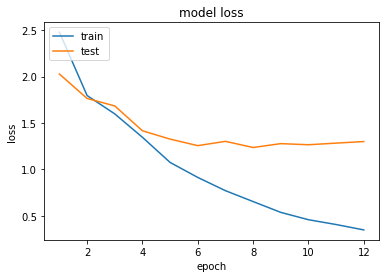

In [48]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()